**Lista de Exercícios da disciplina de Aprendizado de Máquina**  
**PESC - Programa de Engenharia de Sistemas e Computação**  
**COPPE / UFRJ**  
* Autor: Rafael Lopes Conde dos Reis
* E-mail: condereis@cos.ufrj.br
* GitHub: https://github.com/condereis/aprendizado-de-maquina

# Pacotes Utilizados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import chi2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.mixture import GaussianMixture, GMM
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

%matplotlib inline

# Análise Exploratória

In [2]:
data = pd.read_csv('../data/dados-medicos.csv')
data.describe()

,idade,peso,carga,vo2
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,29.394728
std,14.746297,14.799113,70.093124,10.497250
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.450000,220.000000,35.853793
max,91.000000,178.900000,432.000000,73.333333


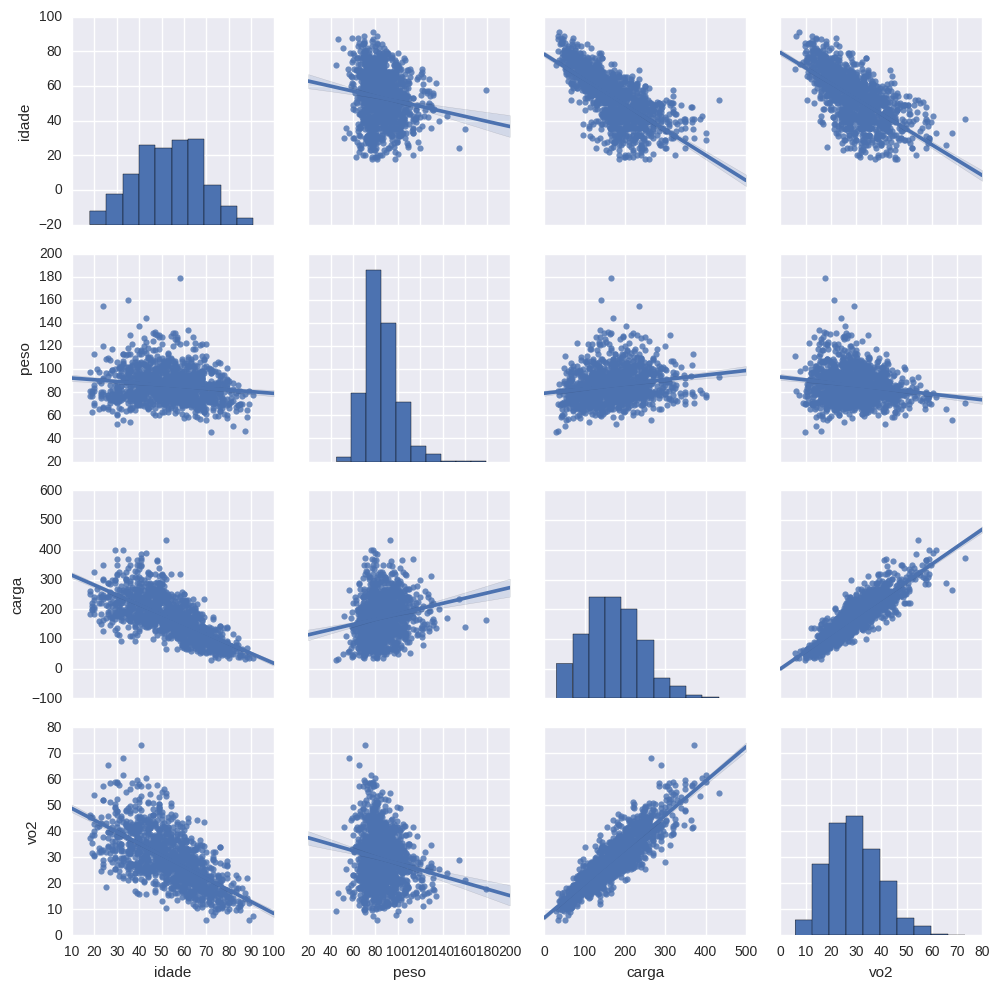

In [3]:
sns.pairplot(data, kind="reg");

# Definições

In [4]:
def NLL(y, y_pred):
    std = sum(np.power((y - y_pred), 2))/float(len(y)-1)
    LL = 0
    for x, mean in zip(y, y_pred):
        LL += norm.logpdf(x, loc=mean, scale=std)
    return abs(LL)

In [5]:
def do_regression(X, y, order=1):
    model = Pipeline([('poly', PolynomialFeatures(degree=order, include_bias=False)),
                  ('linear', LinearRegression())])
    model.fit(X,y)
    y_pred = model.predict(X)
    print 'Features:',model.named_steps['poly'].get_feature_names()
    print 'w:',model.named_steps['linear'].coef_
    print 'b:',model.named_steps['linear'].intercept_
    print 'NLL:', NLL(y, y_pred)

In [6]:
def plot_regression_surface(X, y, order=1):
    model = Pipeline([('poly', PolynomialFeatures(degree=order, include_bias=False)),
                      ('linear', LinearRegression())])
    model.fit(X,y)
    y_pred = model.predict(X)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x_plot = np.linspace(0, 100,100)
    y_plot = np.linspace(0, 500,100)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    XX = np.array([X_plot.ravel(), Y_plot.ravel()]).T
    Z_plot = model.predict(XX)
    Z_plot = Z_plot.reshape(X_plot.shape)
    surf = ax.plot_surface(X_plot, Y_plot, Z_plot)

    ax.set_xlabel('Idade')
    ax.set_ylabel('Carga')
    ax.set_zlabel('VO2 max')

In [7]:
def make_ellipse(covariances, mean, ax):
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1],
                              180 + angle, color='navy')
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

# Questão 1

Consideramos que o modelo de regressão linear é:

$$ y = w^TX + b + \epsilon$$
$$ \epsilon = \mathcal{N}(\mu, \sigma) $$

## Item 1 - Regressão de carga x VO2

### d=1

Features: ['x0']
w: [ 0.13153934]
b: 6.7342478341
NLL: 4881.35218005


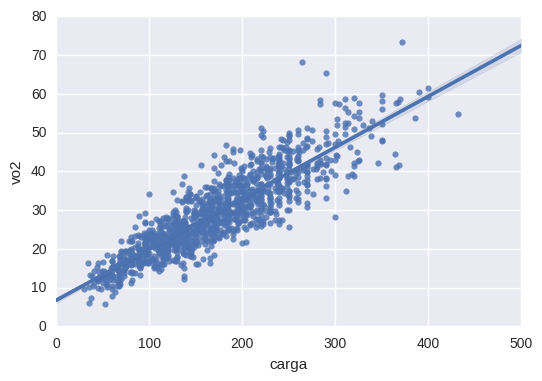

In [8]:
X = data[['carga']]
y = data.vo2.tolist()

do_regression(X, y)
sns.regplot(x="carga", y="vo2", data=data);

### d=2

Features: ['x0', 'x0^2']
w: [  1.42337643e-01  -2.89640765e-05]
b: 5.87576939471
NLL: 4879.70056655


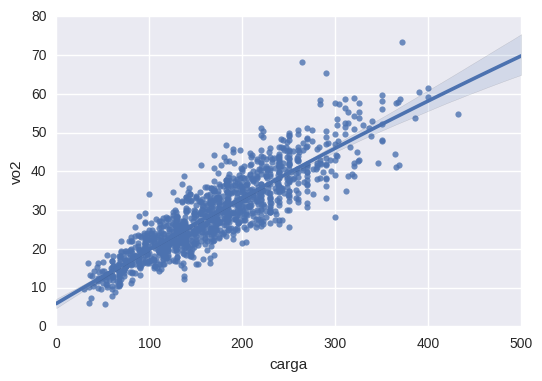

In [9]:
do_regression(X, y, 2)
sns.regplot(x="carga", y="vo2", data=data, order=2);

### d=3

Features: ['x0', 'x0^2', 'x0^3']
w: [  1.37104925e-01   5.55043577e-07  -4.88650338e-08]
b: 6.13683735732
NLL: 4879.65177587


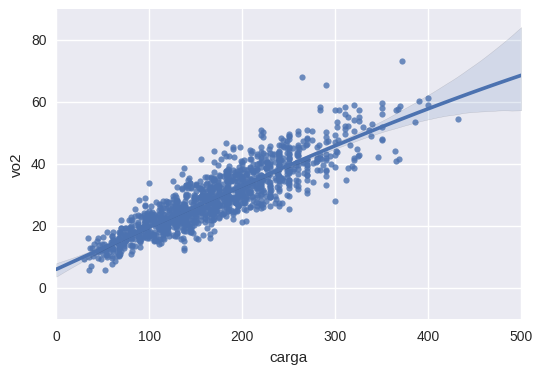

In [10]:
do_regression(X, y, 3)
sns.regplot(x="carga", y="vo2", data=data, order=3);

### d=4

Features: ['x0', 'x0^2', 'x0^3', 'x0^4']
w: [  2.01617768e-01  -5.76564876e-04   1.97738599e-06  -2.41195815e-09]
b: 3.83725413013
NLL: 4878.37293587


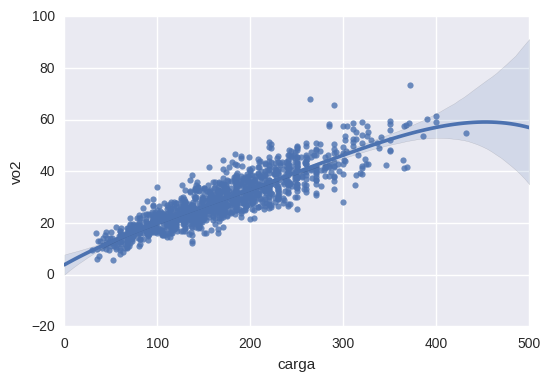

In [11]:
do_regression(X, y, 4)
sns.regplot(x="carga", y="vo2", data=data, order=4);

## Item 2 - Regressão de idade x VO2
### d=1

Features: ['x0']
w: [-0.44852097]
b: 53.2968390982
NLL: 6003.99284245


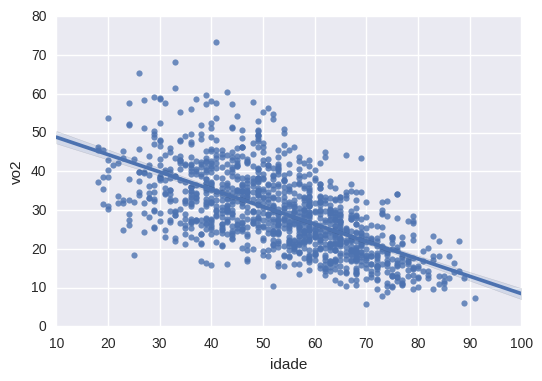

In [12]:
X = data[['idade']]
y = data.vo2.tolist()

do_regression(X, y)
sns.regplot(x="idade", y="vo2", data=data);

### d=2

Features: ['x0', 'x0^2']
w: [ 0.03414487 -0.00457454]
b: 41.5603713399
NLL: 5979.23289858


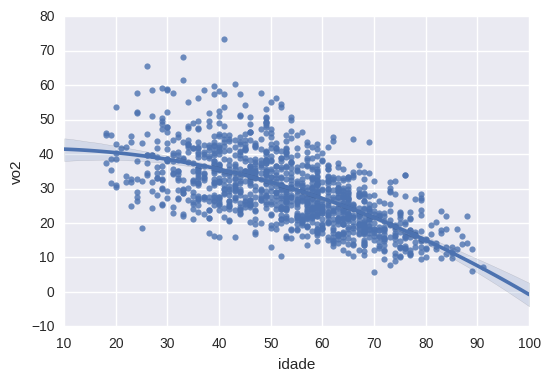

In [13]:
do_regression(X, y, 2)
sns.regplot(x="idade", y="vo2", data=data, order=2);

### d=3

Features: ['x0', 'x0^2', 'x0^3']
w: [  1.14743430e+00  -2.69469817e-02   1.40542319e-04]
b: 24.5099154742
NLL: 5970.55616389


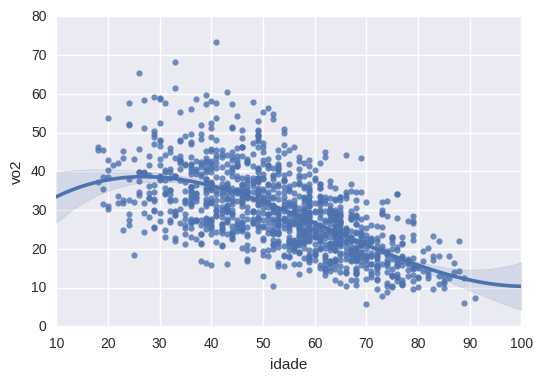

In [14]:
do_regression(X, y, 3)
sns.regplot(x="idade", y="vo2", data=data, order=3);

### d=4

Features: ['x0', 'x0^2', 'x0^3']
w: [  1.14743430e+00  -2.69469817e-02   1.40542319e-04]
b: 24.5099154742
NLL: 5970.55616389


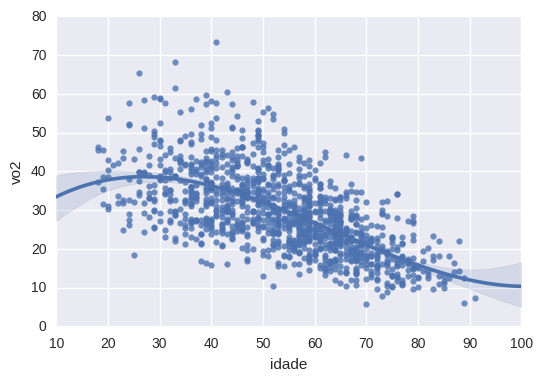

In [15]:
do_regression(X, y, 3)
sns.regplot(x="idade", y="vo2", data=data, order=3);

## Item 3 - Regressão de idade x carga x VO2
### d=1

Features: ['x0', 'x1']
w: [-0.03035634  0.12711958]
b: 9.1133660881
NLL: 4876.57977436


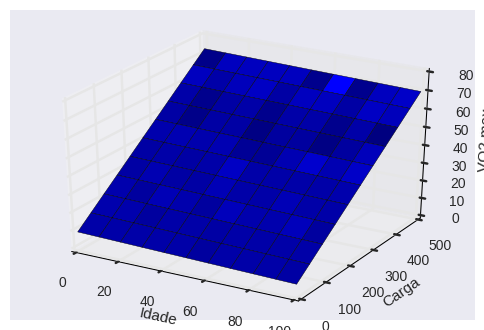

In [16]:
X = data[['idade', 'carga']]
y = data.vo2.tolist()
do_regression(X, y)
plot_regression_surface(X, y)

### d=2

Features: ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
w: [ -3.37291128e-01   1.43321341e-01   2.92691395e-03   1.36577235e-04
  -4.79035363e-05]
b: 14.2315403079
NLL: 4859.71783448


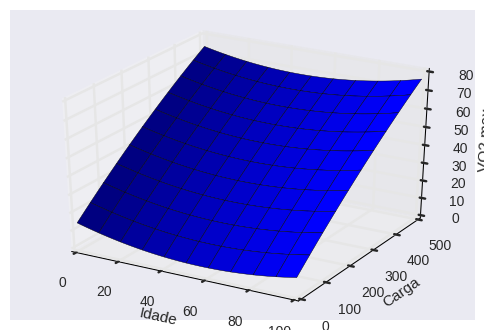

In [17]:
do_regression(X, y, 2)
plot_regression_surface(X, y,2)

### d=3

Features: ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
w: [ -1.68855870e+00  -2.09269909e-01   1.77007372e-02   6.68085137e-03
   9.09358100e-04  -6.31846358e-05  -2.35739180e-05  -1.09584096e-05
  -6.41584246e-07]
b: 58.1435359872
NLL: 4844.81566383


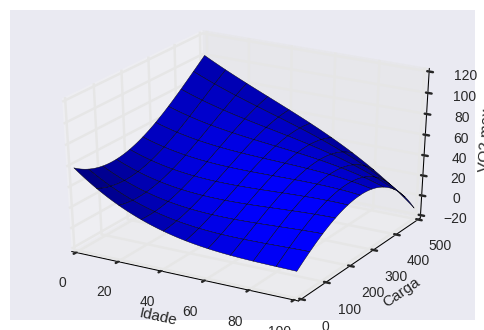

In [18]:
do_regression(X, y, 3)
plot_regression_surface(X, y, 3)

### d=4

Features: ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4']
w: [  2.10615582e+00  -6.00153485e-01  -9.81224211e-02  -5.03303931e-03
   4.31828951e-03   1.16955350e-03   3.78935923e-04  -2.76361949e-05
  -8.92354798e-06  -4.41131313e-06  -2.46330067e-06  -2.39173022e-07
   4.85420287e-08   6.13468976e-09]
b: 45.1093331746
NLL: 4840.592813


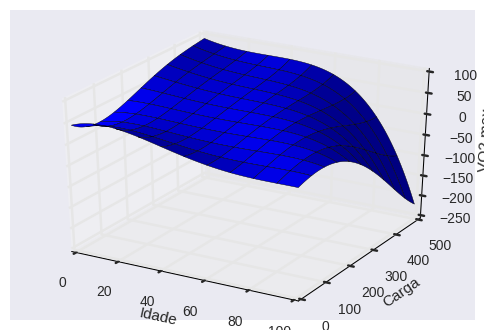

In [19]:
do_regression(X, y, 4)
plot_regression_surface(X, y, 4)

# Questão 2

$$ Cov(X,Y) = E[ (X - E[X]) \times (Y - E[Y]) ]$$
$$ a' = \frac{Cov(X,Y)}{Var(X)} $$
$$ b' = E[Y] - a'E[X] $$

É possível notar que os valores de 'a' e 'b' encontrados foram equivalentes aos encontrados na questão 1

In [20]:
X = data.carga
Y = data.vo2
cov = np.cov(X,Y)
a = cov[1][0] / cov[0][0]
print 'Cov(X,Y) =', cov[1][0]
print 'Var(X) =', cov[0][0]
print 'Var(Y) =', cov[1][1]
print 
print 'a\' =', a
print 'b\' =', np.mean(Y) - a * np.mean(X)

Cov(X,Y) = 646.258839167
Var(X) = 4913.04598476
Var(Y) = 110.192255325

a' = 0.131539342634
b' = 6.7342478341


# Questão 3

## Item 1 - Regressão de carga x VO2

Cov(X,Y) = 645.707423775
Var(X) = 4908.853967
Var(Y) = 110.098235629
E[X] = 172.271501706
E[Y] = 29.3947279232


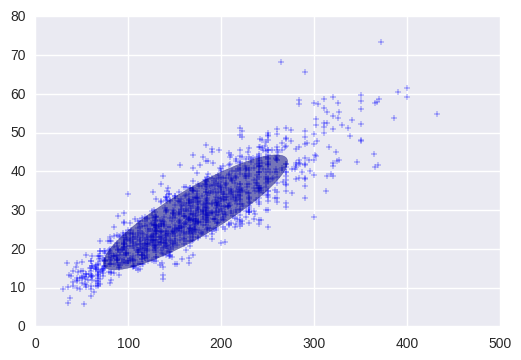

In [21]:
X = data[['carga', 'vo2']]
model = GaussianMixture(n_components=1)
model.fit(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X.carga, X.vo2, marker='+')
make_ellipse(model.covariances_[0], model.means_[0], ax)
print 'Cov(X,Y) =', model.covariances_[0][1][0]
print 'Var(X) =', model.covariances_[0][0][0]
print 'Var(Y) =', model.covariances_[0][1][1]
print 'E[X] =', model.means_[0][0]
print 'E[Y] =', model.means_[0][1]

## Item 2 - Regressão de idade x VO2

Cov(X,Y) = -97.449135015
Var(X) = 217.267734899
Var(Y) = 110.098235629
E[X] = 53.2909556314
E[Y] = 29.3947279232


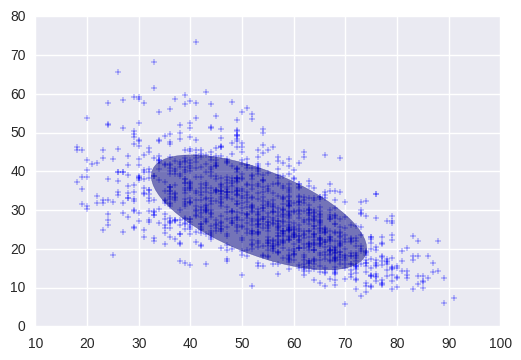

In [22]:
X = data[['idade', 'vo2']]
model = GaussianMixture(n_components=1)
model.fit(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X.idade, X.vo2, marker='+')
make_ellipse(model.covariances_[0], model.means_[0], ax)
print 'Cov(X,Y) =', model.covariances_[0][1][0]
print 'Var(X) =', model.covariances_[0][0][0]
print 'Var(Y) =', model.covariances_[0][1][1]
print 'E[X] =', model.means_[0][0]
print 'E[Y] =', model.means_[0][1]

## Item 3

O modelo da questão 1 assumia que os pontos estavam distribuídos entorno de uma reta com uma distribuição gaussiana de variância constante. Neste caso assume-se que os pontos estão parte de uma distribuição gaussiana bidimenssional. O primeiro modelo é pŕoprio para regressão, estimação, já o segundo, para classificação, clusterização.

## Item 4
É necessário apenas alterar o tamanho das matrizes de covariância e de média.

# Questão 4

## Item 1
Deseja-se construir um Naive Bayes Classifier, ou seja um classificador que fornessa a probabilidade de um evento pertencer a uma classe que assuma que as diferentes features do evento são independentes. Deseja-se:
$$ p(y_i = c_j | x_i) =  \frac{p(y_i = c_j) p(x_i | y_i = c_j)}{p(x_i)}$$
Sendo:
$$ p(y_i = c_j, x_i^1, x_i^2, ..., x_i^n) = p(y_i = c_j) p(x_i | y_i = c_j)$$
Para o caso de variáveis independentes, tem-se:
$$ p(y_i = c_j, x_i^1, x_i^2, ..., x_i^n) = p(y_i = c_j)p(x_i^1 | y_i = c_j)p(x_i^1 | y_i = c_j) ... p(x_i^n | y_i = c_j)$$
$$ p(y_i = c_j) p(x_i | y_i = c_j) = p(y_i = c_j)\prod\limits_{k=1}^n p(x_i^k | y_i = c_j)	$$
Sendo K uma constante de normalização:
$$ p(x_i) = \frac{1}{K}$$
Tem-se que:
$$ p(y_i = c_j | x_i) =  \frac{p(y_i = c_j)}{K} \prod\limits_{k=1}^n p(x_i^k) $$

## Item 2
A diferença é que este modelo disconsidera a covariância entre as features, considerando-as independentes.

## Item 3
Para cada atributo *k* é calculada uma gaussiana como likelihood para cada possível classe *Cj*, tal que:

$$ p(x^k| y = c_j) =  \mathcal{N}(\mu_{c_j}^k, \sigma_{c_j}^k)$$


$$ \hat{\mu_{c_j}^k} = \frac{1}{N}\sum\limits_{i=1}^N x_i^k $$ 
$$ \hat{{\sigma^2}_{c_j}^k} = \frac{1}{N} \sum\limits_{i=1}^N x_i^k - \mu_{c_j}^{MLE^k} $$


In [23]:
bins = [0, 75, 80, 90, 1000]
group_names = ['c1','c2','c3','c4']
data['peso_cat'] = pd.cut(data['peso'], bins, labels=group_names)
gnb = GaussianNB()
gnb.fit(data[['idade','carga', 'vo2']], data['peso_cat'])

GaussianNB(priors=None)

In [24]:
print 'Variâncias (classe/feature):'
print  gnb.sigma_
print
print 'Médias (classe/feature):'
print gnb.theta_

Variâncias (classe/feature):
[[  282.59573494  4689.11050982   141.78286345]
 [  249.15400559  5622.31397616   134.30413488]
 [  195.92685935  4633.0967055    104.88831338]
 [  162.94011066  4250.00293303    71.01545284]]

Médias (classe/feature):
[[  56.31818182  145.10795455   30.25015654]
 [  52.51595745  176.65425532   32.19803478]
 [  54.23384615  175.36615385   30.07160189]
 [  50.86075949  185.79417722   26.93184468]]


# Questão 5

## Item 1

Foi necessário separar os dados em faixas etarias. Isso foi feito separando em quartis.  Cada quartiu foi dividito ao meio para gerar um conjunto de treino e um de teste. Em seguida, para o conjunto de treino foi encontrada a média e a matriz de covariância das gaussianas que maximizam o NLL. Foi testado usar 1, 2, 3 e 4 gaussianas. A preferência foi usar 4 para tentar representar as 4 faixas etárias usadas. 

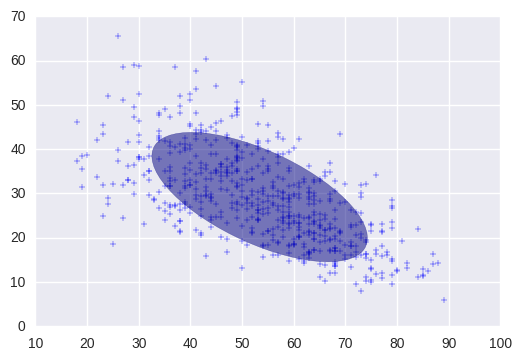

In [25]:
bins = [0, 42, 54, 68, 1000]
group_names = ['c1','c2','c3','c4']
data['idade_cat'] = pd.cut(data['idade'], bins, labels=group_names)
train = pd.DataFrame()
test = pd.DataFrame()
for group in group_names:
    X_train, X_test = train_test_split(data[data['idade_cat'] == group], test_size=0.5, random_state=0)
    train =  train.append(X_train)
    test =  test.append(X_train)
    
model = GaussianMixture(n_components=1)
model.fit(train[['idade','vo2']])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(test.idade, test.vo2, marker='+')
for i in range(len(model.covariances_)):
    make_ellipse(model.covariances_[i], model.means_[i], ax)

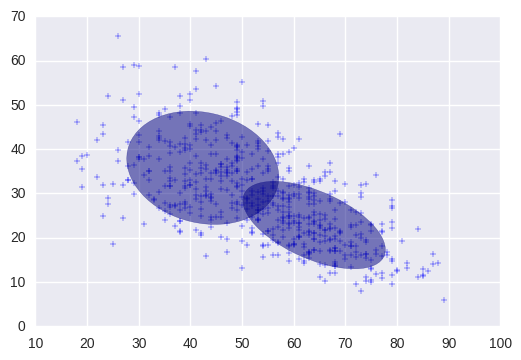

In [26]:
model = GaussianMixture(n_components=2)
model.fit(train[['idade','vo2']])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(test.idade, test.vo2, marker='+')
for i in range(len(model.covariances_)):
    make_ellipse(model.covariances_[i], model.means_[i], ax)

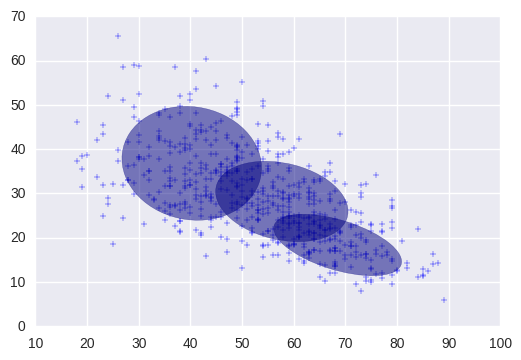

In [27]:
model = GaussianMixture(n_components=3)
model.fit(train[['idade','vo2']])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(test.idade, test.vo2, marker='+')
for i in range(len(model.covariances_)):
    make_ellipse(model.covariances_[i], model.means_[i], ax)

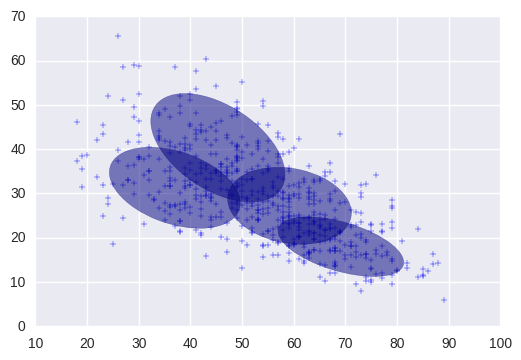

In [28]:
model = GaussianMixture(n_components=4)
model.fit(train[['idade','vo2']])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(test.idade, test.vo2, marker='+')
for i in range(len(model.covariances_)):
    make_ellipse(model.covariances_[i], model.means_[i], ax)

## Item 2

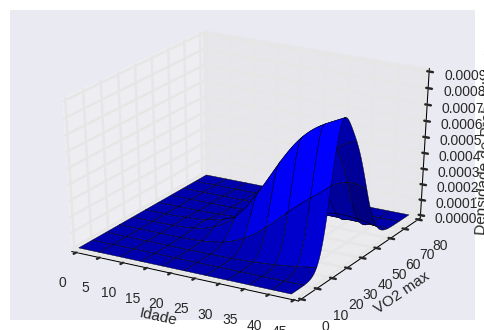

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x_plot = np.linspace(0, 44,100)
y_plot = np.linspace(0, 80,100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
XX = np.array([X_plot.ravel(), Y_plot.ravel()]).T
Z_plot = np.exp(model.score_samples(XX))
Z_plot = Z_plot.reshape(X_plot.shape)
surf = ax.plot_surface(X_plot, Y_plot, Z_plot)
ax.set_xlabel('Idade')
ax.set_ylabel('VO2 max')
ax.set_zlabel('Densidade de Probabilidade')

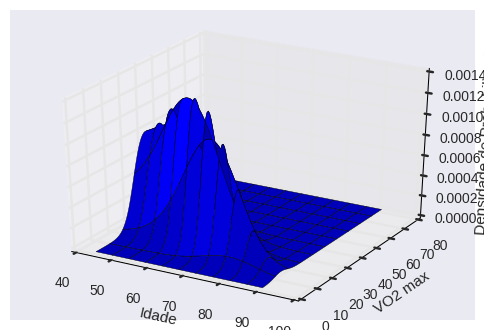

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x_plot = np.linspace(45, 91,100)
y_plot = np.linspace(0, 80,100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
XX = np.array([X_plot.ravel(), Y_plot.ravel()]).T
Z_plot = np.exp(model.score_samples(XX))
Z_plot = Z_plot.reshape(X_plot.shape)
surf = ax.plot_surface(X_plot, Y_plot, Z_plot)
ax.set_xlabel('Idade')
ax.set_ylabel('VO2 max')
ax.set_zlabel('Densidade de Probabilidade')

## Item 3

Foi calculada a probabilidade de haver um valor de VO2 max entre 28 e 35 para um valor de idade de 45 anos. A probabilidade encontada é bastante baixa. Isso porque foi fixada uma idade, e não uma faixa de idades.

In [31]:
x_plot = [45] * 1000
y_plot = np.linspace(28, 35,1000)
X = [ [x, y] for x, y in zip(x_plot,y_plot)]
Y = np.exp(model.score_samples(X))
prob = 0
for out in Y:
    prob += out * (35 - 28) / 1000
print 'Probabilidade:', prob

Probabilidade: 0.00607833294605


## Item 4

Este modelo leva em consideração a covariância das variáveis, ou seja não é assumido que as mesmas são independentes. Isso possibilita o modelo ser mais próximo da real distribuição dos dados do que o modelo da questão 4.

## Item 5

É possivel notar que mais próximo ao centro da distribuição a distribuição do modelo é muito próxima a distribuição dos dados reais e vai se afasta quanto mais distante do centro da distribuição.

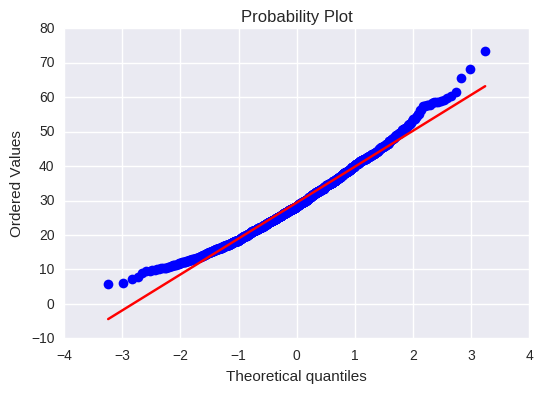

In [32]:
measurements = data['vo2']
stats.probplot(measurements, dist=norm, plot=pylab)
pylab.show()